# 02. Preprocessing and Windowing

This notebook demonstrates the signal preprocessing pipeline: Bandpass filtering, Normalization, and Segmentation.

In [51]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath('..'))

from src.data_loader import MITBIHDataLoader
from src.preprocessing import ECGPreprocessor
from src.windowing import WindowGenerator
from src.labeling import Labeler

In [52]:
from pathlib import Path

# Project directories
PROJECT_ROOT = Path("..")

RAW_DIR = PROJECT_ROOT / "data" / "raw"
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
WINDOWS_DIR = PROJECT_ROOT / "data" / "windows"

# Create dirs if not exist
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
WINDOWS_DIR.mkdir(parents=True, exist_ok=True)

print("Directories ready:")
print("RAW:", RAW_DIR)
print("PROCESSED:", PROCESSED_DIR)
print("WINDOWS:", WINDOWS_DIR)


Directories ready:
RAW: ..\data\raw
PROCESSED: ..\data\processed
WINDOWS: ..\data\windows


## Initialize Components

In [53]:
loader = MITBIHDataLoader("../data/raw")
preprocessor = ECGPreprocessor(fs=360)
window_gen = WindowGenerator(fs=360, window_seconds=5.0, step_seconds=2.5)
labeler = Labeler()

signals, _, annotation = loader.load_record('105')

## Preprocessing Comparisons

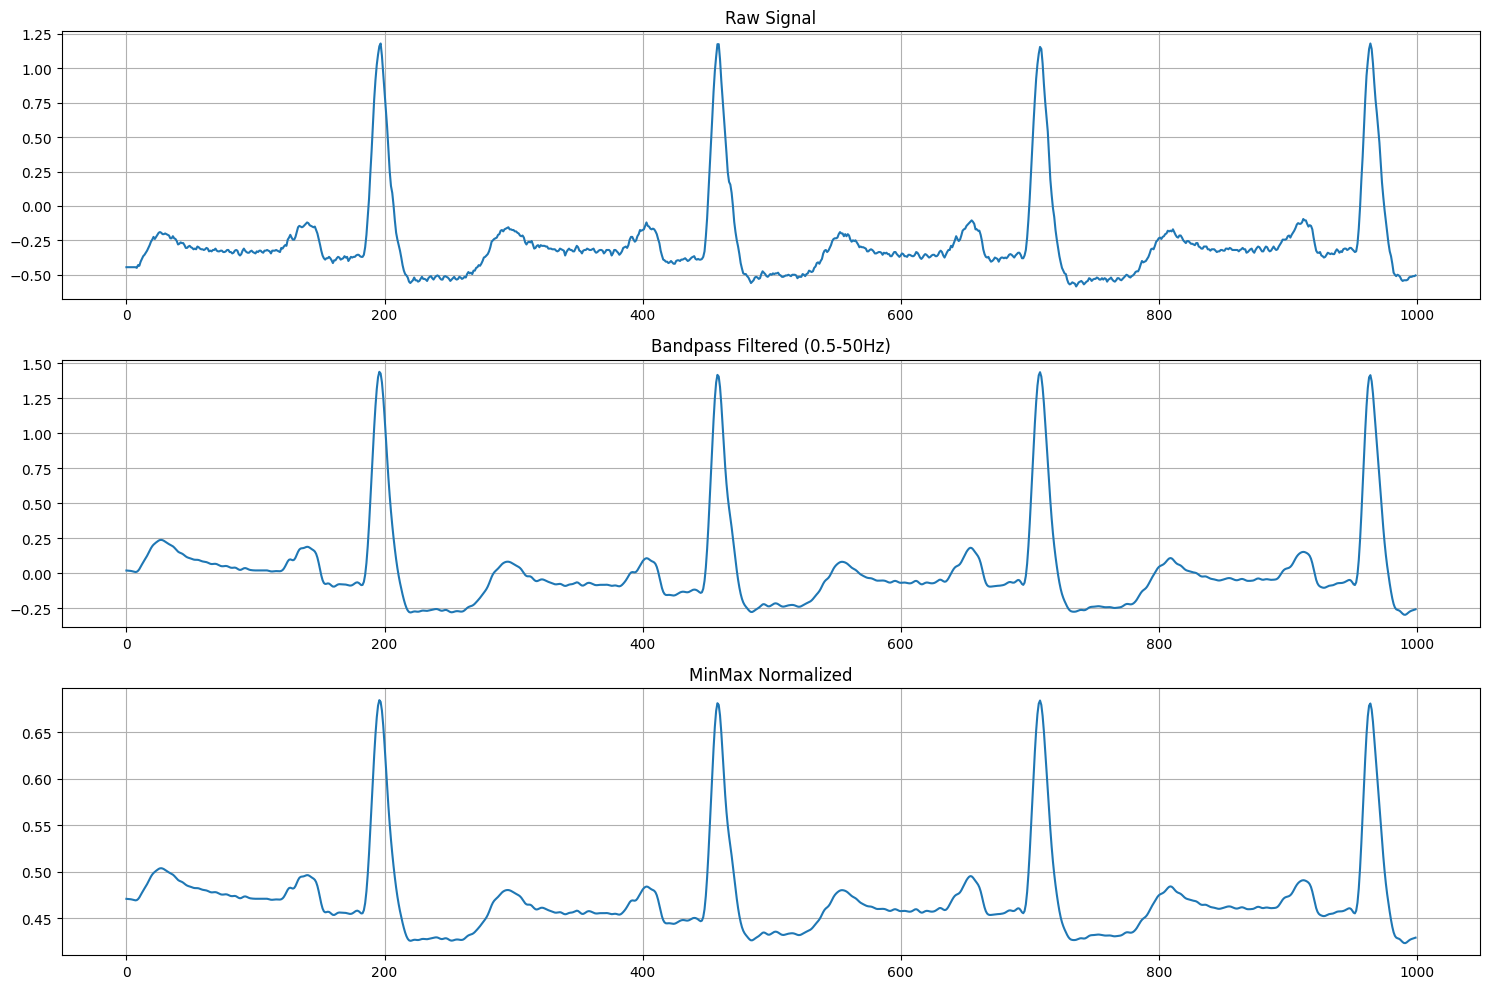

In [54]:
# Raw vs Filtered
filtered = preprocessor.bandpass_filter(signals)
normalized = preprocessor.normalize(filtered)

limit = 1000
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(signals[:limit, 0])
plt.title("Raw Signal")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(filtered[:limit, 0])
plt.title("Bandpass Filtered (0.5-50Hz)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(normalized[:limit, 0])
plt.title("MinMax Normalized")
plt.grid()

plt.tight_layout()
plt.show()

In [55]:
def preprocess_ecg(ecg_signal):
    filtered = preprocessor.bandpass_filter(signals)
    normalized = preprocessor.normalize(filtered)

    return normalized


In [56]:
import numpy as np

def save_processed_signal(signal, record_id):
    """
    Save preprocessed ECG signal
    """
    out_path = PROCESSED_DIR / f"{record_id}_processed.npy"
    np.save(out_path, signal)
    return out_path

record_id = "105"  # example

processed_ecg = preprocess_ecg(signals)

save_processed_signal(processed_ecg, record_id)


WindowsPath('../data/processed/105_processed.npy')

## Windowing

Total Windows: 721
Label Distribution: (array([0, 1]), array([631,  90]))


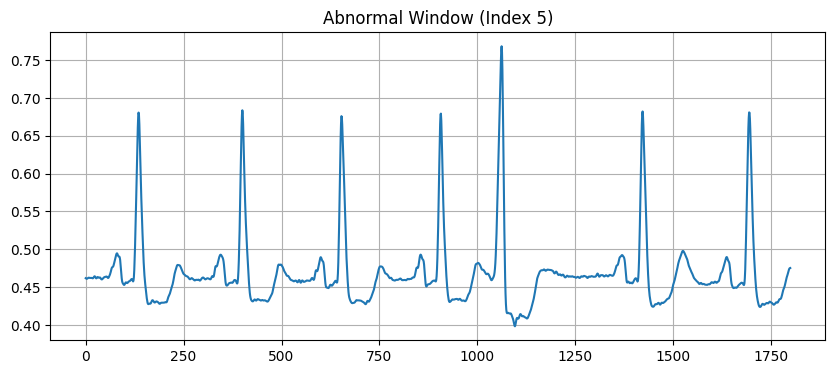

In [57]:
windows = window_gen.segment_signal(normalized)
window_indices = window_gen.segment_metadata(normalized.shape[0])
labels = labeler.get_labels(annotation, window_indices)

print(f"Total Windows: {len(windows)}")
print(f"Label Distribution: {np.unique(labels, return_counts=True)}")

# 0 = Normal, 1 = Abnormal
abnormal_indices = np.where(labels == 1)[0]
if len(abnormal_indices) > 0:
    idx = abnormal_indices[0]
    plt.figure(figsize=(10, 4))
    plt.plot(windows[idx, :, 0])
    plt.title(f"Abnormal Window (Index {idx})")
    plt.grid()
    plt.show()

In [58]:
from pathlib import Path
import numpy as np

WINDOWS_DIR = Path("..") / "data" / "windows"
WINDOWS_DIR.mkdir(parents=True, exist_ok=True)

record_id = "105"


def save_windows_and_labels(windows, labels, record_id):
    windows_path = WINDOWS_DIR / f"{record_id}_windows.npy"
    labels_path = WINDOWS_DIR / f"{record_id}_labels.npy"

    np.save(windows_path, windows)
    np.save(labels_path, labels)

    return windows_path, labels_path


save_windows_and_labels(windows, labels, record_id)


(WindowsPath('../data/windows/105_windows.npy'),
 WindowsPath('../data/windows/105_labels.npy'))